<a href="https://colab.research.google.com/github/NathanielTav/DS_seminar_project1/blob/main/Pytrends_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# source: https://medium.com/the-data-science-publication/how-to-use-the-pytrends-api-to-get-google-trends-data-4378acbaaa8a
# motivation: https://tradingstrategyguides.com/google-trends-trading-strategies/
# https://www.ecb.europa.eu/events/pdf/conferences/140407/presentations/panel1/Preis-Tobias-Preis-ECB-Frankfurt.pdf?1ac7136314e7e06115cb456003c36c74
# https://www.nature.com/articles/srep01684

In [ ]:
!pip install pytrends
!pip install yfinance
!pip install matplotlib

In [3]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

In [4]:
# build list of keywords
kw_list = ["Debt", "Stocks", "Portfolio"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2007-01-01 2021-01-01', geo='US')

In [5]:
# import pandas module
import pandas as pd

# store interest over time information in df
df = pytrends.interest_over_time()

# display the top 20 rows in dataframe
print(df.head(5))

            Debt  Stocks  Portfolio  isPartial
date                                          
2007-01-01    27      27         14      False
2007-02-01    27      29         13      False
2007-03-01    26      26         14      False
2007-04-01    28      25         15      False
2007-05-01    26      24         14      False


<Figure size 432x288 with 0 Axes>

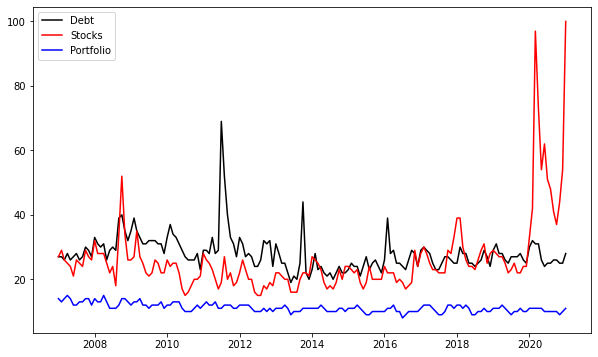

In [7]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all three trends in same chart
plt.figure()
plt.subplots(figsize=(10, 6))

plt.plot(df.index,df.Debt,'k',linestyle="-")
plt.plot(df.index,df.Stocks,'r',linestyle="-")
plt.plot(df.index,df.Portfolio,'b',linestyle="-")
plt.legend(["Debt", "Stocks", "Portfolio"])
plt.show()

In [11]:
import yfinance as yf
d1='2007-01-01'
d2='2021-01-01'
data = yf.download(tickers="^GSPC", start=d1, end=d2)

[*********************100%***********************]  1 of 1 completed


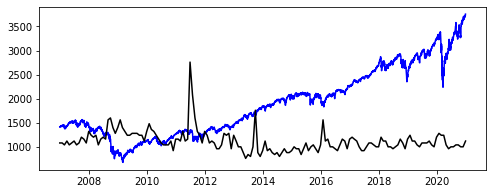

In [12]:
plt.subplots(figsize=(8, 3))
plt.plot(data.index,data['Adj Close']	,'b',linestyle="-")
plt.plot(df.index,40*df.Debt,'k',linestyle="-")

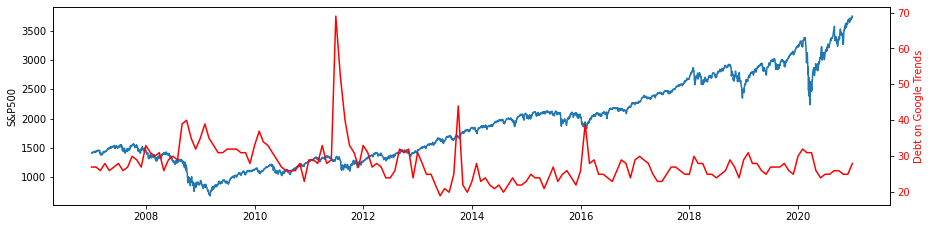

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#https://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
x1 = data.index
x2 = df.index
y1 = data['Adj Close']
y2 = df.Debt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(211)

ax1.plot(x1, y1)
ax1.set_ylabel('S&P500')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel('Debt on Google Trends', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')



In [18]:
#https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f
# Get Google Keyword Suggestions
keywords = pytrends.suggestions(keyword='Stock market')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # This column makes no sense

,title,type
0,Stock market,Topic
1,Stock exchange,Topic
2,Nasdaq,Stock exchange
3,Initial public offering,Topic
4,Stock market index,Topic


In [23]:
pytrends.build_payload(kw_list=['Stock market'])
# Related Queries, returns a dictionary of dataframes
related_queries = pytrends.related_queries()
related_queries.values()


dict_values([{'top':                        query  value
0         stock market today    100
1           the stock market     94
2          stock market news     36
3       what is stock market     25
4           dow stock market     25
5                        dow     24
6               market crash     23
7         stock market crash     23
8       stock market futures     22
9              stock futures     22
10            market futures     22
11         stock market open     22
12                    stocks     20
13           us stock market     17
14  what is the stock market     17
15    dow jones stock market     16
16                 dow jones     15
17         live stock market     13
18          stock market cnn     11
19        trump stock market     11
20        stock market close     10
21        stock market index     10
22              market hours     10
23        stock market hours      9
24         stock market game      8, 'rising':                                 

In [25]:
# Related Topics, returns a dictionary of dataframes
related_topic = pytrends.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue  ...                   topic_title            topic_type
0    1100        +1,100%  ...                     Robinhood               Company
1     300          +300%  ...                   Tesla, Inc.  Electric car company
2     250          +250%  ...                   NASDAQ:AMZN                 Topic
3     250          +250%  ...                        Boeing     Aerospace company
4     200          +200%  ...              Futures exchange                 Topic
5     190          +190%  ...                  NYSEARCA:SPY                 Topic
6     170          +170%  ...                   Dow futures                 Topic
7     140          +140%  ...              Futures contract                 Topic
8     130          +130%  ...     Stock market index future                 Topic
9      80           +80%  ...                       NYSE:GE                 Topic
10     80           +80%  ...         Real estate economics        Field o